In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

Preprocessing

In [4]:
print(all_data.isnull().sum().sort_values(ascending=False))
print(all_data.duplicated().sum())

label    50000
f14          0
f26          0
f25          0
f24          0
f23          0
f22          0
f21          0
f20          0
f19          0
f18          0
f17          0
f16          0
f15          0
f13          0
f0           0
f12          0
f11          0
f10          0
f9           0
f8           0
f7           0
f6           0
f5           0
f4           0
f3           0
f2           0
f1           0
f27          0
dtype: int64
13


In [5]:
all_data.describe()

label             f0             f1             f2  \
count  50000.000000  100000.000000  100000.000000  100000.000000   
mean       0.531300       0.990371      -0.003816      -0.001638   
std        0.499024       0.561837       1.004841       1.006189   
min        0.000000       0.274697      -2.434976      -1.742508   
25%        0.000000       0.590936      -0.741244      -0.868047   
50%        1.000000       0.854835      -0.002976       0.000971   
75%        1.000000       1.236776       0.735292       0.868220   
max        1.000000       7.805887       2.433894       1.743236   

                  f3             f4             f5             f6  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.995049      -0.007613       0.987114      -0.003000   
std         0.595360       1.006997       0.473118       1.008685   
min         0.001283      -1.743944       0.139976      -2.968735   
25%         0.575635      -0.881465       0.676336      -0.688235   
50%         0.890268      -0.011024       0.892163      -0.000025   
75%         1.290871       0.865868       1.167809       0.683233   
max         7.998711       1.743229       7.064657       2.969674   

                  f7             f8  ...            f18            f19  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        0.000438       0.998344  ...      -0.007575      -0.004029   
std         1.008430       1.027402  ...       1.009173       1.007090   
min        -1.741237       0.000000  ...      -2.497265      -1.742691   
25%        -0.867542       0.000000  ...      -0.725017      -0.877028   
50%        -0.003822       1.086538  ...      -0.010455      -0.009698   
75%         0.871223       2.173076  ...       0.710770       0.869386   
max         1.741454       2.173076  ...       2.498009       1.743372   

                 f20            f21            f22            f23  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.992721       1.032611       1.023153       1.050193   
std         1.396788       0.652455       0.371610       0.164857   
min         0.000000       0.110875       0.303144       0.133012   
25%         0.000000       0.791306       0.846631       0.985775   
50%         0.000000       0.895600       0.950719       0.989742   
75%         3.101961       1.025925       1.083218       1.020762   
max         3.101961      18.428827      10.038273       4.565248   

                 f24            f25            f26            f27  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        1.010189       0.973081       1.031873       0.959199  
std         0.398267       0.523552       0.363394       0.313257  
min         0.295983       0.048125       0.303350       0.350939  
25%         0.767261       0.673792       0.819170       0.769964  
50%         0.917302       0.874004       0.947037       0.871038  
75%         1.141633       1.139816       1.139032       1.057478  
max         7.442589      11.994177       7.318191       6.015647  

[8 rows x 29 columns]

Visualizing the data

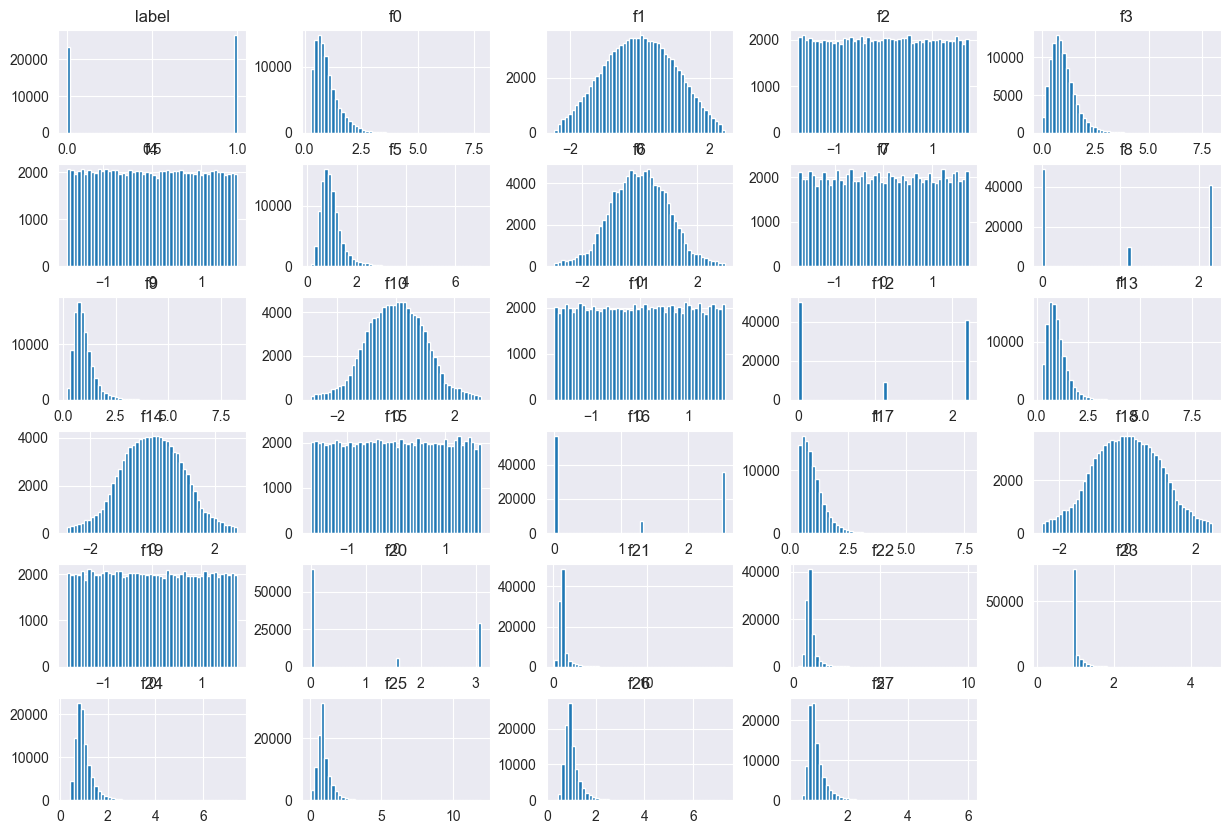

In [29]:
all_data.hist(figsize=(15, 10), bins=50)
plt.show()

I notice that features 8, 12, 16, and 20 observe non-normal distributions. So I will examine these features further.

In [7]:
for col in ['f8', 'f12', 'f16', 'f20']:
    print(f"{col}: {training[col].nunique()} unique values")

f8: 3 unique values
f12: 3 unique values
f16: 3 unique values
f20: 3 unique values


In [8]:
for col in ['f8', 'f12', 'f16', 'f20']:
    print(training[col].value_counts())

f8
0.000000    24599
2.173076    20408
1.086538     4993
Name: count, dtype: int64
f12
0.000000    24955
2.214872    20363
1.107436     4682
Name: count, dtype: int64
f16
0.000000    28371
2.548224    17864
1.274112     3765
Name: count, dtype: int64
f20
0.000000    32571
3.101961    14385
1.550981     3044
Name: count, dtype: int64


From this we can see that these features may be categorical despite being numerical. I will examine the relationship between these features and the target variable.

          label        f0        f1        f2        f3        f4        f5  \
label  1.000000 -0.051872 -0.007501  0.002977 -0.094442 -0.008044  0.049674   
f0    -0.051872  1.000000 -0.004442  0.001025 -0.138891 -0.001533  0.175633   
f1    -0.007501 -0.004442  1.000000 -0.002513 -0.002453  0.003578  0.000677   
f2     0.002977  0.001025 -0.002513  1.000000  0.003273 -0.053338 -0.008121   
f3    -0.094442 -0.138891 -0.002453  0.003273  1.000000  0.003533  0.196777   
f4    -0.008044 -0.001533  0.003578 -0.053338  0.003533  1.000000 -0.002735   
f5     0.049674  0.175633  0.000677 -0.008121  0.196777 -0.002735  1.000000   
f6    -0.008622 -0.000380  0.269530 -0.000939 -0.008384 -0.003730 -0.002768   
f7    -0.004010  0.002784 -0.001804 -0.169199  0.000295 -0.150982 -0.004980   
f8    -0.011846 -0.004676  0.002068  0.001860 -0.026451  0.002640 -0.017354   
f9     0.020275  0.007342  0.004242 -0.002348  0.034967  0.000010  0.482917   
f10    0.000760 -0.009257  0.265495  0.004503  0.006

<Axes: >

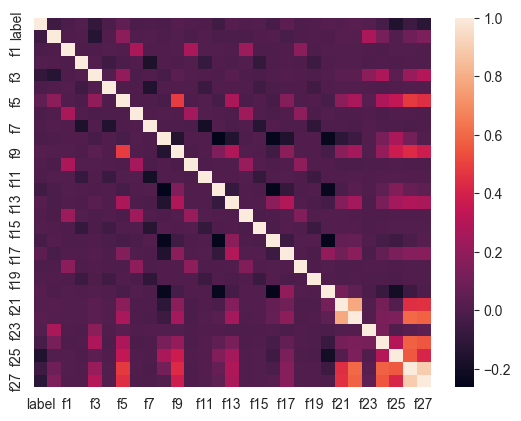

In [9]:
print(training.corr())
sns.heatmap(training.corr())

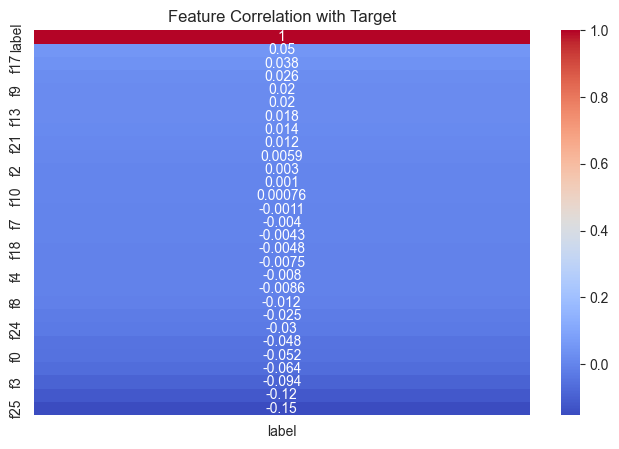

label    1.000000
f5       0.049674
f17      0.038161
f22      0.025623
f9       0.020275
f20      0.019509
f13      0.018040
f23      0.014017
f21      0.011898
f15      0.005868
f2       0.002977
f14      0.001025
f10      0.000760
f19     -0.001148
f7      -0.004010
f11     -0.004285
f18     -0.004802
f1      -0.007501
f4      -0.008044
f6      -0.008622
f8      -0.011846
f16     -0.025141
f24     -0.030470
f12     -0.047721
f0      -0.051872
f26     -0.064444
f3      -0.094442
f27     -0.121544
f25     -0.153301
Name: label, dtype: float64


In [10]:
# Compute correlations
corr_matrix = training.corr()
corr_with_label = corr_matrix['label'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[['label']].sort_values(by='label', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()

# Print sorted correlations
print(corr_with_label)

The correlation data show that all features, including the four odd ones have weak correlation with the target variable.

In [11]:
# Train baseline model with all features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Prepare data
X = training.drop(columns=['label'])
y = training['label']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model (using all features)
# RandomForrest chosen based on performance in previous notebook
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

# Evaluate
auc_baseline = roc_auc_score(y_val, y_pred)
print(f"Baseline AUC: {auc_baseline:.4f}")

Baseline AUC: 0.7841


In [12]:
# Train baseline model without the odd features
X_train_filtered = X_train.drop(columns=['f8', 'f12', 'f16', 'f20'])
X_val_filtered = X_val.drop(columns=['f8', 'f12', 'f16', 'f20'])

model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
model_filtered.fit(X_train_filtered, y_train)
y_pred_filtered = model_filtered.predict_proba(X_val_filtered)[:, 1]

auc_filtered = roc_auc_score(y_val, y_pred_filtered)
print(f"AUC without f8, f12, f16, f20: {auc_filtered:.4f}")

AUC without f8, f12, f16, f20: 0.7851


Based on the result, it may be worth dropping the odd features from the dataset and training the model again on the modified dataset.


In [35]:
X_train = X_train.drop(columns=['f8', 'f12', 'f16', 'f20'])
X_val = X_val.drop(columns=['f8', 'f12', 'f16', 'f20'])

KeyError: "['f8', 'f12', 'f16', 'f20'] not found in axis"

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Run Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Evaluate
y_pred_best = best_model.predict_proba(X_val)[:, 1]
auc_best = roc_auc_score(y_val, y_pred_best)
print(f"Optimized AUC: {auc_best:.4f}")


KeyboardInterrupt: 

So the optimized model has a slightly better AUC score than the baseline model. Based off the previous notebook, it will be worth trying out XGBoost, LightGBM, and CatBoost to see if they can outperform the Random Forest model.

Random Forest AUC: 0.7558


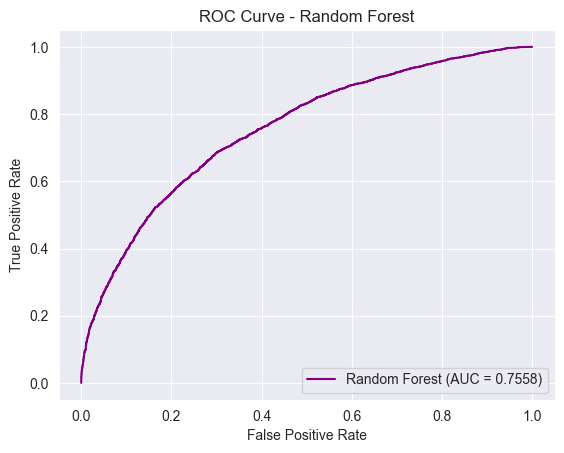

In [15]:
from sklearn.metrics import roc_curve

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=6)
rf_model.fit(X_train, y_train)

# Predict probabilities and calculate AUC
y_pred_rf = rf_model.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
print(f"Random Forest AUC: {auc_rf:.4f}")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)

# Plot
plt.plot(fpr_rf, tpr_rf, color='purple', label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

XGBoost AUC: 0.7968


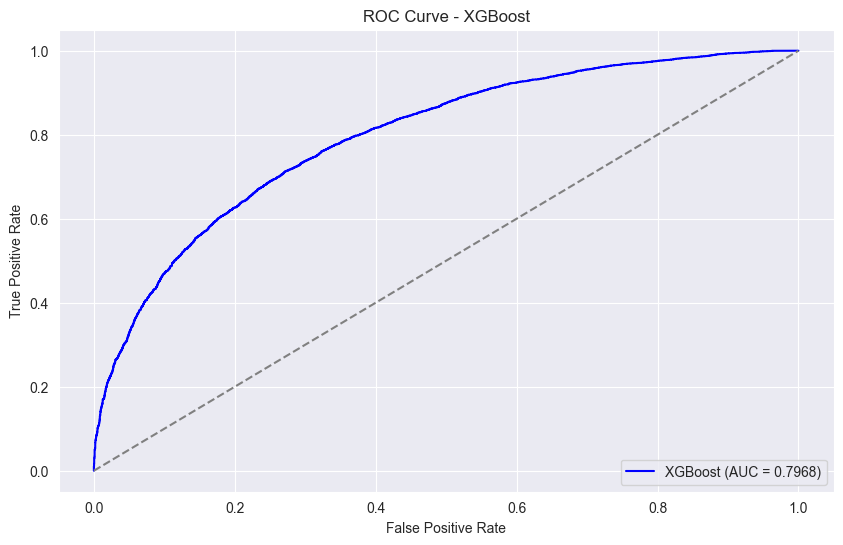

In [16]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict probabilities and calculate AUC
y_pred_xgb = xgb_model.predict_proba(X_val)[:, 1]
auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"XGBoost AUC: {auc_xgb:.4f}")

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

CatBoost AUC: 0.7885


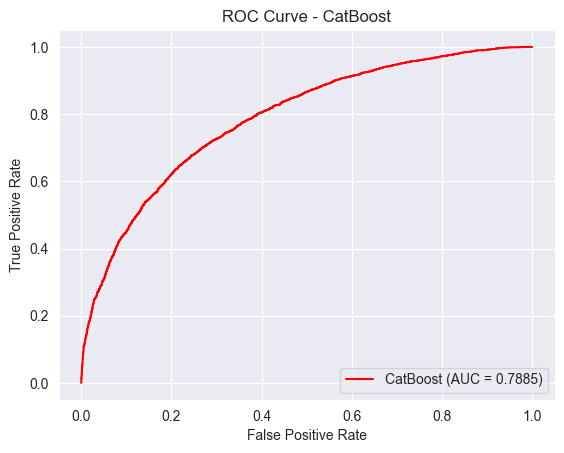

In [17]:
from catboost import CatBoostClassifier

# Initialize and train CatBoost model
catboost_model = CatBoostClassifier(random_state=42, iterations=100, depth=6, learning_rate=0.1, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict probabilities and calculate AUC
y_pred_catboost = catboost_model.predict_proba(X_val)[:, 1]
auc_catboost = roc_auc_score(y_val, y_pred_catboost)
print(f"CatBoost AUC: {auc_catboost:.4f}")

# ROC Curve
fpr_catboost, tpr_catboost, _ = roc_curve(y_val, y_pred_catboost)

# Plot
plt.plot(fpr_catboost, tpr_catboost, color='red', label=f'CatBoost (AUC = {auc_catboost:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.show()

[LightGBM] [Info] Number of positive: 21283, number of negative: 18717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532075 -> initscore=0.128476
[LightGBM] [Info] Start training from score 0.128476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC: 0.7952


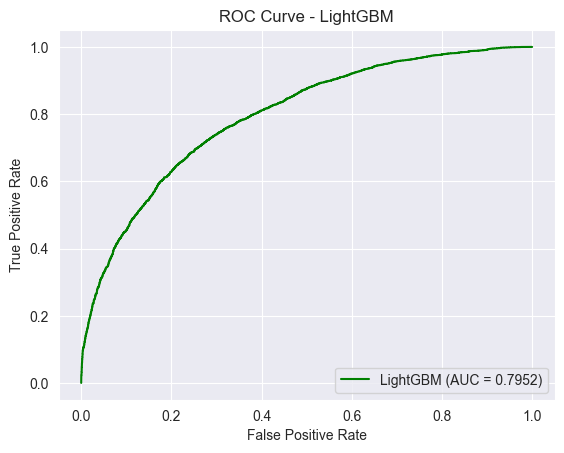

In [18]:
import lightgbm as lgb

# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict probabilities and calculate AUC
y_pred_lgb = lgb_model.predict_proba(X_val)[:, 1]
auc_lgb = roc_auc_score(y_val, y_pred_lgb)
print(f"LightGBM AUC: {auc_lgb:.4f}")

# ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_pred_lgb)

# Plot
plt.plot(fpr_lgb, tpr_lgb, color='green', label=f'LightGBM (AUC = {auc_lgb:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

At a glance, XGBoost has the best performance based on AUC.

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Hyperparameter grids and distributions for Random Forest, XGBoost, LightGBM, and CatBoost

# Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
}

# LightGBM
param_dist_lgb = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, -1],  # -1 means no limit
    'subsample': [0.7, 0.8, 1.0],
}

param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, -1],
    'subsample': [0.7, 0.8, 1.0],
}

# CatBoost
param_dist_cat = {
    'iterations': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 6, 10],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
}

param_grid_cat = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 6, 10],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
}

# Applying RandomizedSearchCV and GridSearchCV on RandomForestClassifier, XGBoost, LightGBM, and CatBoost
# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for Random Forest
)
random_search_rf.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Params (Random Forest): {random_search_rf.best_params_}")

# Fine-tune with GridSearchCV based on best hyperparameters from RandomizedSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for Grid Search Random Forest
)
grid_search_rf.fit(X_train, y_train)
print(f"GridSearchCV Best Params (Random Forest): {grid_search_rf.best_params_}")
print(f"Best Score (Random Forest): {grid_search_rf.best_score_}")

# RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for XGBoost
)
random_search_xgb.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Params (XGBoost): {random_search_xgb.best_params_}")

# Fine-tune with GridSearchCV based on best hyperparameters from RandomizedSearchCV
grid_search_xgb = GridSearchCV(
    XGBClassifier(),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for Grid Search XGBoost
)
grid_search_xgb.fit(X_train, y_train)
print(f"GridSearchCV Best Params (XGBoost): {grid_search_xgb.best_params_}")
print(f"Best Score (XGBoost): {grid_search_xgb.best_score_}")

# RandomizedSearchCV for LightGBM
random_search_lgb = RandomizedSearchCV(
    lgb.LGBMClassifier(),
    param_distributions=param_dist_lgb,
    n_iter=10,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for LightGBM
)
random_search_lgb.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Params (LightGBM): {random_search_lgb.best_params_}")

# Fine-tune with GridSearchCV based on best hyperparameters from RandomizedSearchCV
grid_search_lgb = GridSearchCV(
    lgb.LGBMClassifier(),
    param_grid=param_grid_lgb,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for Grid Search LightGBM
)
grid_search_lgb.fit(X_train, y_train)
print(f"GridSearchCV Best Params (LightGBM): {grid_search_lgb.best_params_}")
print(f"Best Score (LightGBM): {grid_search_lgb.best_score_}")

# RandomizedSearchCV for CatBoost
random_search_cat = RandomizedSearchCV(
    CatBoostClassifier(learning_rate=0.1, cat_features=[]),  # Adjust as necessary
    param_distributions=param_dist_cat,
    n_iter=10,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for CatBoost
)
random_search_cat.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Params (CatBoost): {random_search_cat.best_params_}")

# Fine-tune with GridSearchCV based on best hyperparameters from RandomizedSearchCV
grid_search_cat = GridSearchCV(
    CatBoostClassifier(learning_rate=0.1, cat_features=[]),  # Adjust as necessary
    param_grid=param_grid_cat,
    cv=5,
    scoring='roc_auc'  # Specify ROC AUC for Grid Search CatBoost
)
grid_search_cat.fit(X_train, y_train)
print(f"GridSearchCV Best Params (CatBoost): {grid_search_cat.best_params_}")
print(f"Best Score (CatBoost): {grid_search_cat.best_score_}")


RandomizedSearchCV Best Params (Random Forest): {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 162}
GridSearchCV Best Params (Random Forest): {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Random Forest): 0.787819849388195
RandomizedSearchCV Best Params (XGBoost): {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 98, 'subsample': 1.0}
GridSearchCV Best Params (XGBoost): {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best Score (XGBoost): 0.7944314900919113
[LightGBM] [Info] Number of positive: 17026, number of negative: 14974
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532062 -> initscore=0.128426
[LightGBM] [Info] Star

In [40]:
# AUC scores for all models
print(f"Best Score (Random Forest): {grid_search_rf.best_score_}")
print(f"Best Score (XGBoost): {grid_search_xgb.best_score_}")
print(f"Best Score (LightGBM): {grid_search_lgb.best_score_}")
print(f"Best Score (CatBoost): {grid_search_cat.best_score_}")

Best Score (Random Forest): 0.787819849388195
Best Score (XGBoost): 0.7944314900919113
Best Score (LightGBM): 0.7976327995510811
Best Score (CatBoost): 0.7952608336909031


In [41]:
# Best hyperparams for LightGBM
print(f"GridSearchCV Best Params (LightGBM): {grid_search_lgb.best_params_}")

GridSearchCV Best Params (LightGBM): {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.7}


In [43]:
# Define the best LightGBM model using the hyperparameters from tuning
best_params = {
    'learning_rate': 0.05,
    'max_depth': 10,
    'n_estimators': 200,
    'num_leaves': 100,
    'subsample': 0.7
}

best_lgb_model = lgb.LGBMClassifier(random_state=42, **best_params)

# Train the best model on the training data
best_lgb_model.fit(X_train, y_train)

# Generate predictions for validation set (optional, for performance evaluation)
y_pred_val = best_lgb_model.predict_proba(X_val)[:, 1]

# Optionally calculate the AUC for validation set
auc_val = roc_auc_score(y_val, y_pred_val)
print(f"LightGBM AUC (Validation Set): {auc_val:.4f}")


[LightGBM] [Info] Number of positive: 21283, number of negative: 18717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532075 -> initscore=0.128476
[LightGBM] [Info] Start training from score 0.128476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC (Validation Set): 0.7984


In [44]:
# List of features to drop from the test set
features_to_drop = ['f8', 'f12', 'f16', 'f20']

# Drop the same features from the test set
X_test = test.drop(columns=features_to_drop)  # Remove 'Id' and the specified features

# Now, you can generate predictions for the test set using the trained LightGBM model
y_pred_test = best_lgb_model.predict_proba(X_test)[:, 1]

In [68]:
test_predictions = pd.DataFrame({
    'Id': test.index,  # Convert the index to string type
    'Predicted': y_pred_test  # Predicted probabilities for the positive class
})

# Convert 'Id' column to float64
test_predictions['Id'] = test_predictions['Id'].astype('float64')

# Save the submission file
test_predictions.to_csv('submission.csv', index=False, float_format="%.18e")

In [62]:
# Load your CSV into a DataFrame
df = pd.read_csv('sample_submission.csv')

# Check the data types of the columns
print(df.dtypes)

# To check the datatype of a specific column:
print(df['Id'].dtype)

Id           float64
Predicted    float64
dtype: object
float64
